In [0]:

import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
import os
%matplotlib inline 


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:

data = pd.read_csv('/content/drive/My Drive/8sept/project/Bank_Personal_Loan_Modelling-1.csv')


In [5]:
data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90,3,0,1,0,0,0,0


In [6]:
data.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


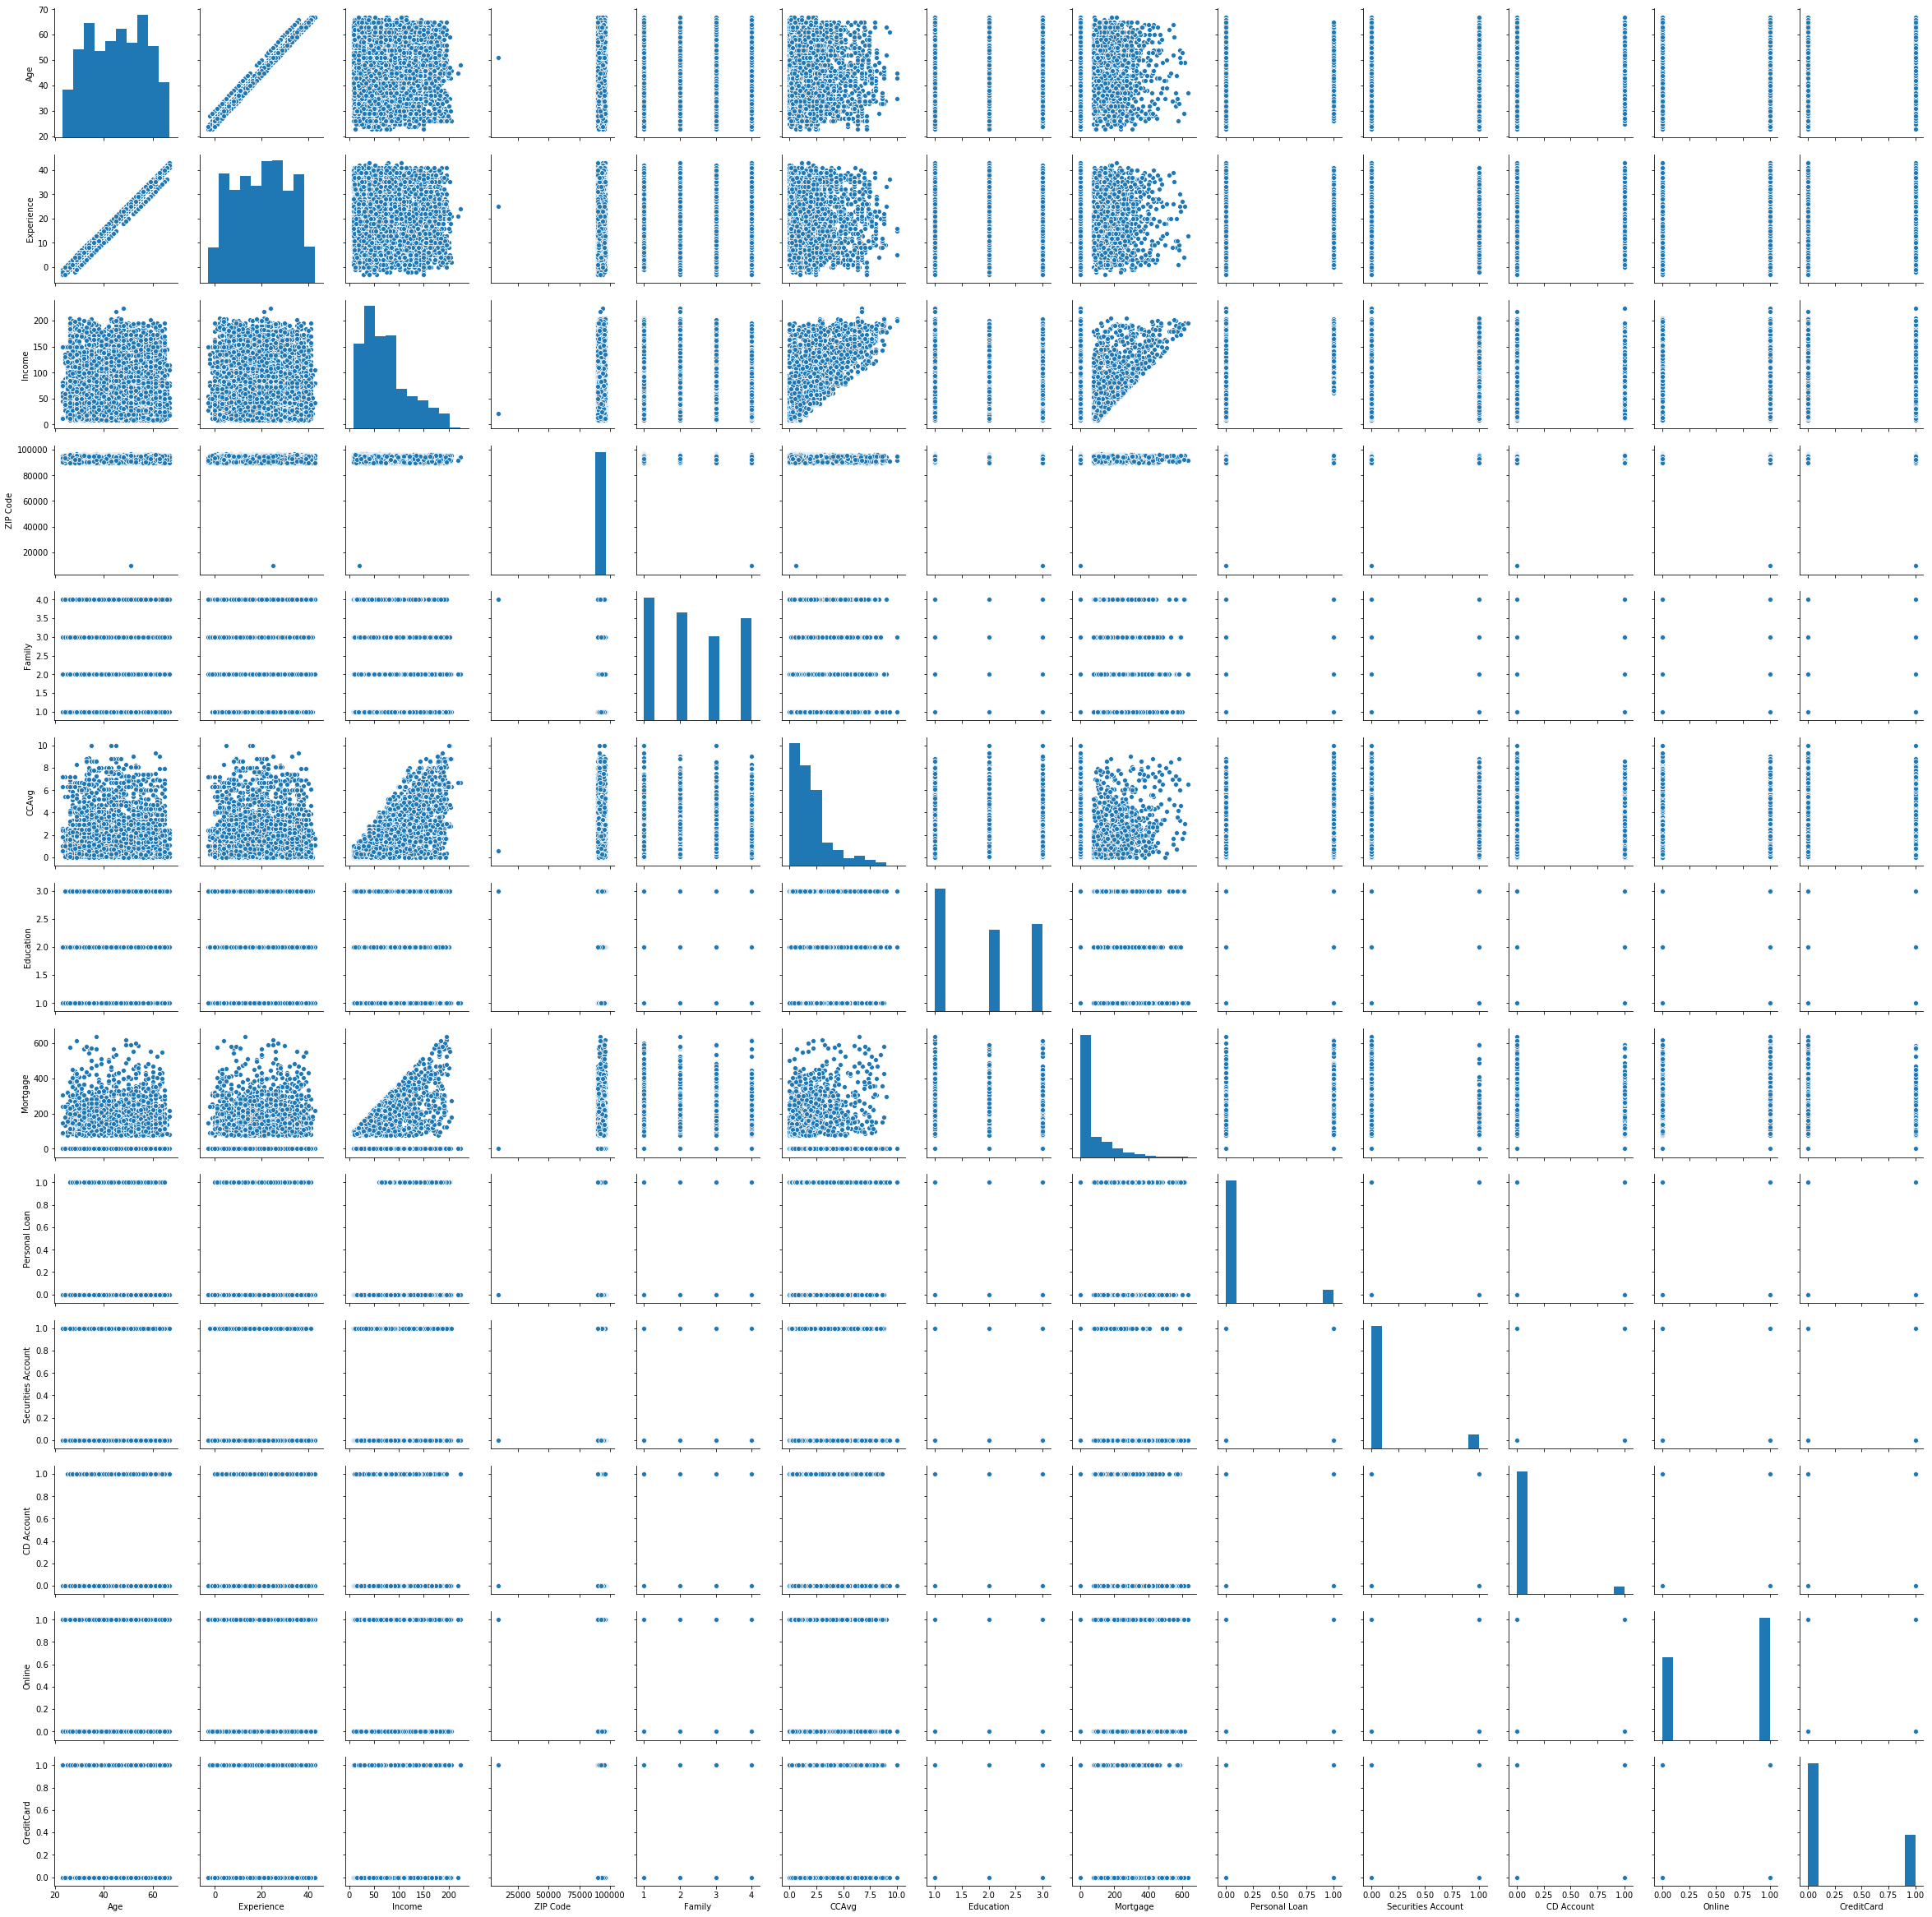

In [8]:
plt = sns.pairplot(data[['Age','Experience','Income','ZIP Code','Family','CCAvg' ,'Education' , 'Mortgage','Personal Loan','Securities Account','CD Account','Online','CreditCard']] )

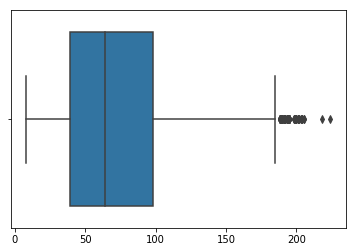

In [9]:
plt = sns.boxplot(data[['Income']])

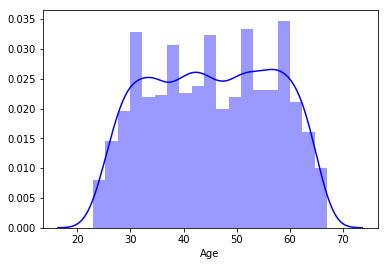

In [10]:
plt=sns.distplot(data['Age'], color = 'b')

In [0]:
#Observation 

#Most of the customers age is in  range of 30 to 60 yrs and their experience ranging  of 5 to 35 years and with  income between 10K to 100K.


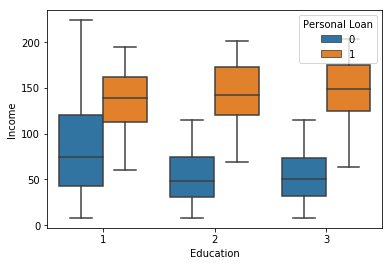

In [12]:
sns.boxplot(x="Education", y="Income", hue="Personal Loan", data=data)

In [0]:
# here people with education leavel 1 have highh income but people who go for personal loans have same income dsitribution regardless of income level  

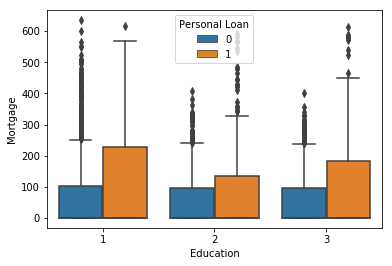

In [13]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=data)

In [0]:
# people who have taken load are having high mortguage

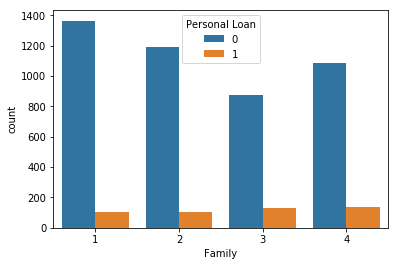

In [40]:
sns.countplot(x="Family", data=data,hue="Personal Loan")

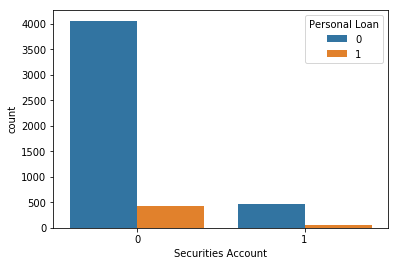

In [48]:
sns.countplot(x="Securities Account", data=data, hue="Personal Loan")

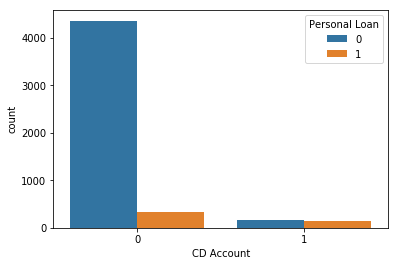

In [50]:
sns.countplot(x="CD Account", data=data,hue="Personal Loan")

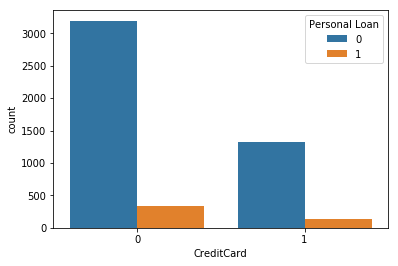

In [52]:
sns.countplot(x="CreditCard", data=data,hue="Personal Loan")

In [0]:
import pandas as pd
import numpy as np
import matplotlib as mp
import seaborn as sns
%matplotlib inline
sns.set(style="ticks")

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from scipy.stats import zscore

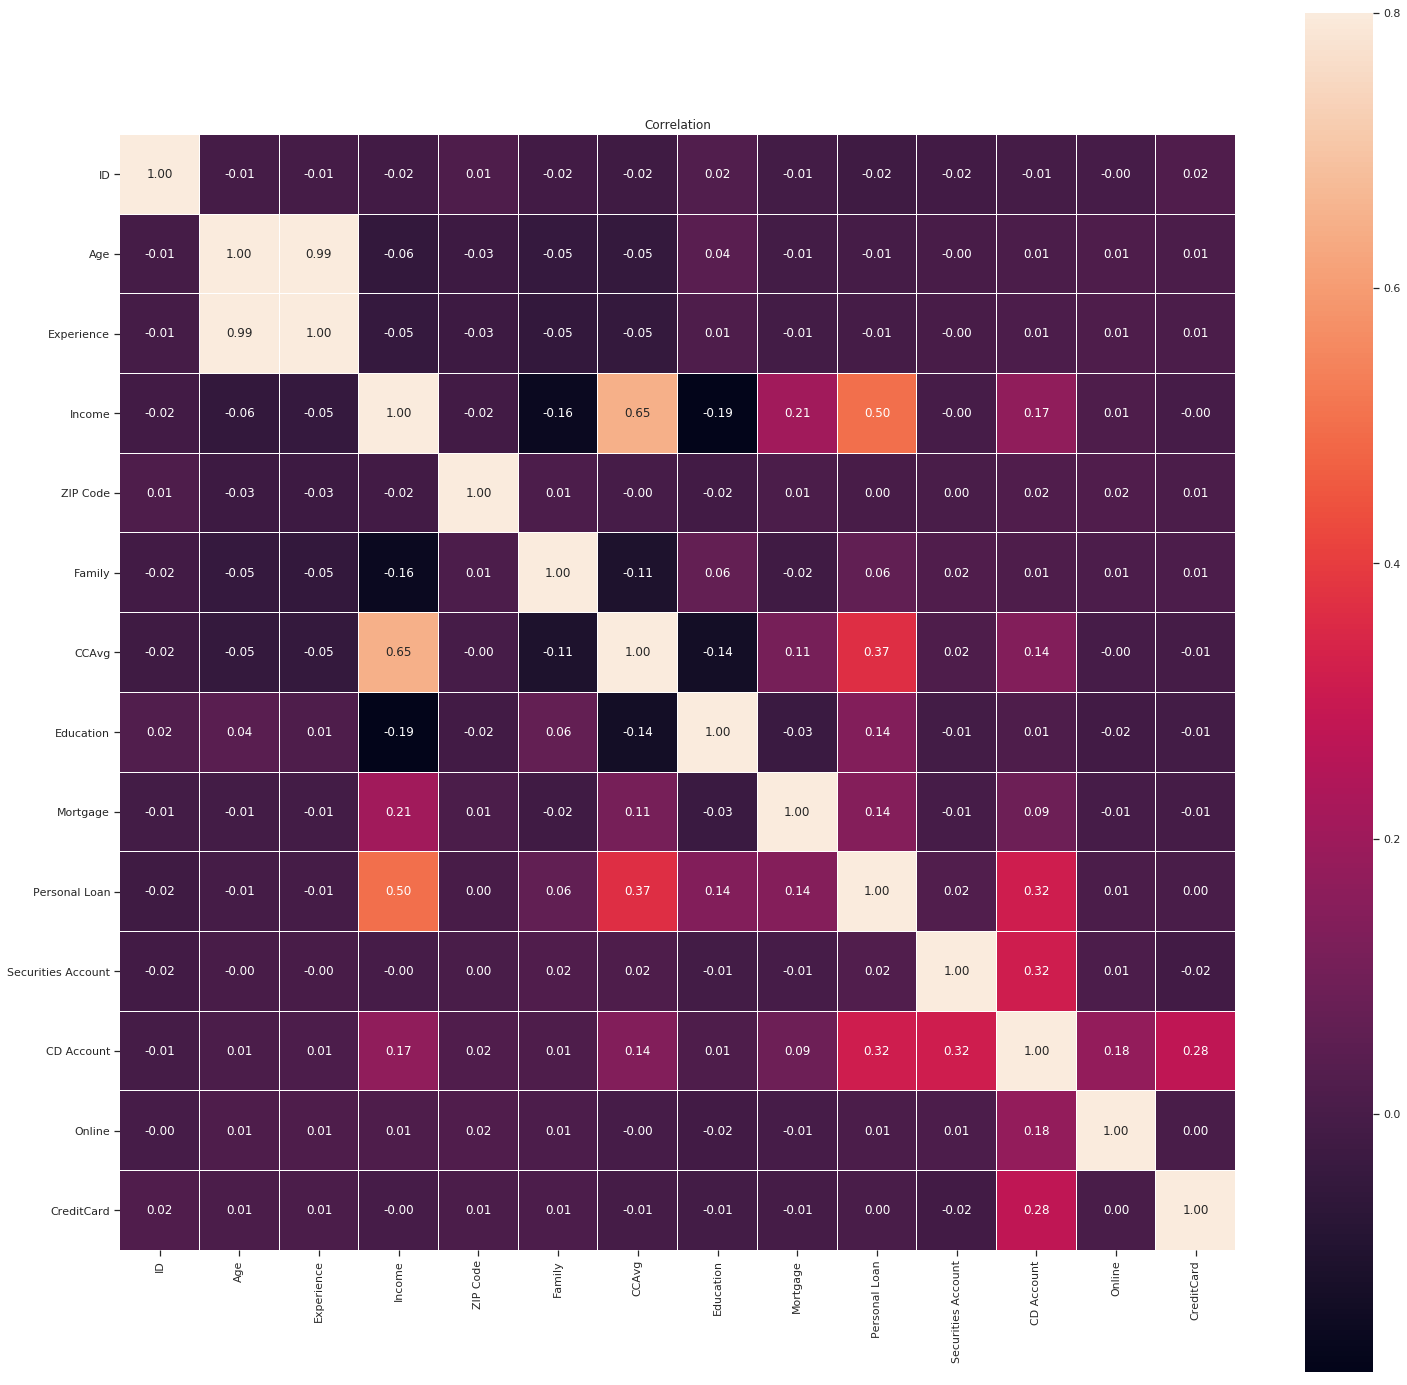

In [58]:
from matplotlib import pyplot as plt
plt.figure(figsize=(25, 25))
ax = sns.heatmap(data.corr(), vmax=.8, square=True, fmt='.2f', annot=True, linecolor='white', linewidths=0.01)
plt.title('Correlation')
plt.show()

In [0]:
#Age and Experience is highly corelated
#Income and CCAvg also corelated

In [0]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data.drop(['Experience' ,'ID' ,'CCAvg'], axis=1), test_size=0.3 , random_state=53)

In [60]:
train_set.describe()

,Age,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000,3500.000000
mean,45.458286,73.814571,93176.260286,2.402857,1.890286,57.439714,0.094857,0.106857,0.061143,0.595714,0.296286
std,11.498213,45.987910,1739.659921,1.148576,0.840846,101.949410,0.293059,0.308976,0.239626,0.490823,0.456684
min,23.000000,8.000000,90005.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,92007.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46.000000,64.000000,93407.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,99.000000,94608.000000,3.000000,3.000000,102.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
test_set.describe()

,Age,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,45.058667,73.680000,93097.069333,2.381333,1.859333,54.303333,0.098667,0.098667,0.058667,0.599333,0.288667
std,11.379875,46.155684,2818.830809,1.145772,0.837465,101.161761,0.298313,0.298313,0.235078,0.490197,0.453294
min,23.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35.000000,39.000000,91768.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,64.000000,93555.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,95.000000,94608.000000,3.000000,3.000000,97.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,67.000000,205.000000,96651.000000,4.000000,3.000000,612.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [0]:

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
train_labels = train_set.pop("Personal Loan")
test_labels = test_set.pop("Personal Loan")

In [0]:
#DecisionTreeClassifier

In [0]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 3)

In [65]:
dt_model.fit(train_set, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [66]:
dt_model.score(test_set , test_labels)


0.974

In [0]:
#Naive Bayes

In [67]:
naive_model = GaussianNB()
naive_model.fit(train_set, train_labels)

prediction = naive_model.predict(test_set)
naive_model.score(test_set,test_labels)

0.9166666666666666

In [68]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
cm = pd.DataFrame(confusion_matrix(test_labels, prediction).T, index=['No', 'Yes'], columns=['No', 'Yes'])
cm.index.name = 'Predicted'
cm.columns.name = 'True'
cm

True,No,Yes
Predicted,,
No,1296,69
Yes,56,79


In [0]:
#RandomForestClassifier

In [69]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(train_set, train_labels)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

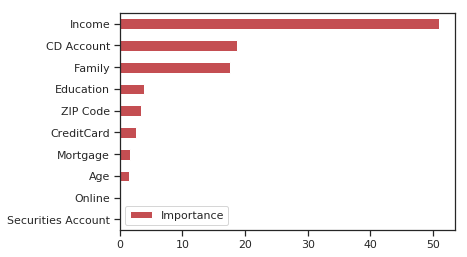

In [70]:

Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=train_set.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )

In [0]:
predicted_random=randomforest_model.predict(test_set)

In [72]:

randomforest_model.score(test_set,test_labels)

0.9246666666666666

In [0]:
#KNeighborsClassifier

In [0]:
train_set_indep = data.drop(['Experience' ,'ID' ,'CCAvg'] , axis = 1).drop(labels= "Personal Loan" , axis = 1)
train_set_indep_z = train_set_indep.apply(zscore)
train_set_dep = data["Personal Loan"]
X = np.array(train_set_indep_z)
Y = np.array(train_set_dep)
X_Train = X[ :3500, :]
X_Test = X[3501: , :]
Y_Train = Y[:3500, ]
Y_Test = Y[3501:, ]

In [0]:
knn = KNeighborsClassifier(n_neighbors= 21 , weights = 'uniform', metric='euclidean')
knn.fit(X_Train, Y_Train)    
predicted = knn.predict(X_Test)
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_Test, predicted)

In [76]:

print(acc)

0.9446297531687792


In [0]:
#DecisionTreeClassifier gives the highest accuracy .0974